=== Data Cleaning Summary ===

Missing Values:
 Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Total_Amount      0
Payment_Method    0
Region            0
dtype: int64

Data Types:
 Transaction_ID             int64
Date              datetime64[ns]
Customer_ID               object
Product                   object
Category                  object
Quantity                   int64
Price                      int64
Total_Amount             float64
Payment_Method            object
Region                    object
dtype: object

Preview of Cleaned Data:


,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North
5,1006,2024-02-10,C001,Laptop,Electronics,1,800,800.0,Credit Card,North



=== Summary Statistics (Mean, Median, Std) ===


,Quantity,Price,Total_Amount
mean,1.578947,300.526316,375.263158
median,1.000000,200.000000,200.000000
std,0.901591,288.814121,389.067524



Most Common Payment Method: Cash
Most Common Product Category: Electronics

=== Customer Behavior & Sales Insights ===

Best-Selling Months (Total Sales):
Date
4    1740.0
6    1380.0
2    1360.0
1    1300.0
5    1025.0
3     325.0
Name: Total_Amount, dtype: float64

Most Popular Categories (by Purchase Count):
Category
Electronics    12
Clothing        4
Books           3
Name: count, dtype: int64

Top Products (by Purchase Count):
Product
Smartphone    3
Tablet        3
Book          3
Headphones    2
Laptop        2
Shoes         2
T-Shirt       2
Smartwatch    2
Name: count, dtype: int64

Top Regions by Total Sales:
Region
South    3225.0
East     1900.0
North    1780.0
West      225.0
Name: Total_Amount, dtype: float64

Top Customers by Total Spending:
Customer_ID
C002    2400.0
C001     800.0
C013     800.0
C017     600.0
C010     500.0
C004     500.0
C018     500.0
C008     200.0
C015     200.0
C006     100.0
C012     100.0
C003     100.0
C016      80.0
C014      75.0
C005     

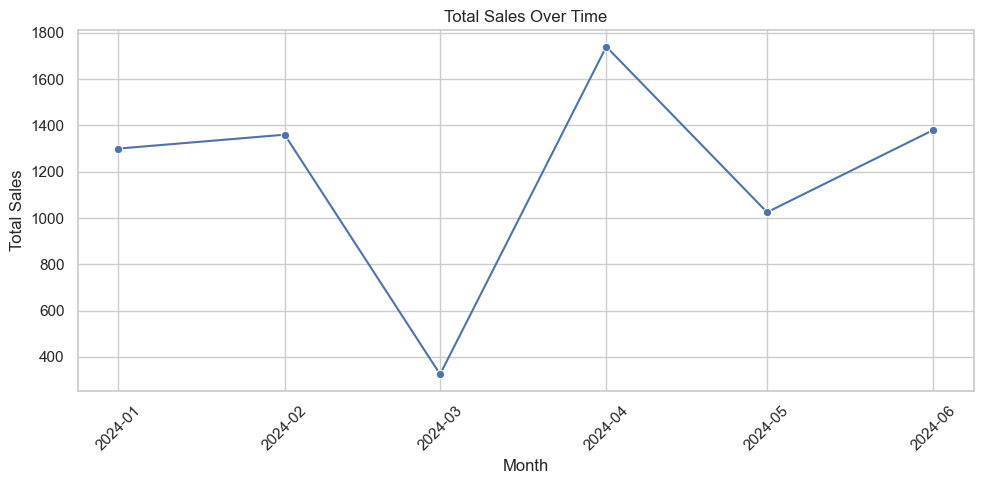

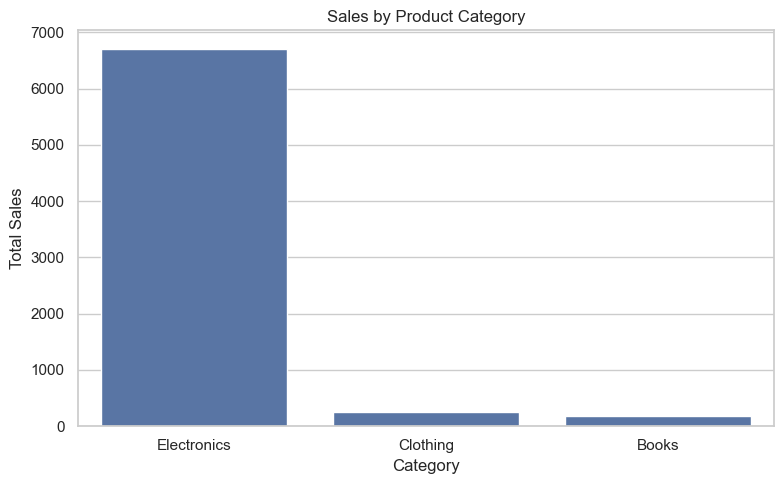

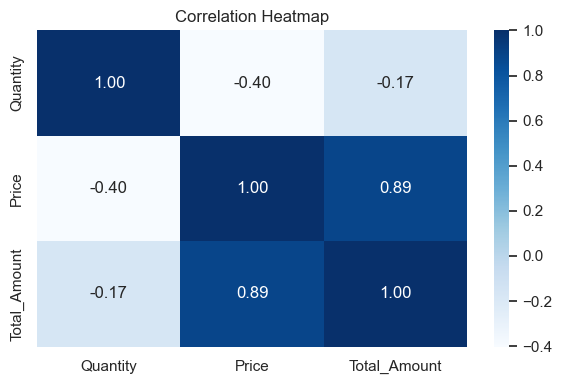

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ---------------------------------------------
# LOAD & VALIDATE RAW DATASET
# ---------------------------------------------
file_path = r'C:\Users\angel\OneDrive\Documents\sales_data.csv'

# Read with bad line skipping for safety
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')

# Keep only rows with all required columns
required_columns = ['Transaction_ID', 'Date', 'Customer_ID', 'Product', 'Category', 
                    'Quantity', 'Price', 'Total_Amount', 'Payment_Method', 'Region']
df = df.dropna(subset=required_columns, how='any')
df = df[required_columns]

# ---------------------------------------------
# CLEAN DATA
# ---------------------------------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Total_Amount'] = df['Total_Amount'].fillna(df['Quantity'] * df['Price'])
df = df.drop_duplicates(subset=['Transaction_ID'])
df = df.dropna()

# ---------------------------------------------
# EXPORT CLEANED DATASET (on separate line)
# ---------------------------------------------
export_folder = r'C:\Users\angel\OneDrive\Documents\ShopEase_Exports'
os.makedirs(export_folder, exist_ok=True)
df.to_csv(os.path.join(export_folder, 'cleaned_sales_data.csv'), index=False)

# ---------------------------------------------
# DATA CLEANING SUMMARY
# ---------------------------------------------
print("=== Data Cleaning Summary ===\n")
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nPreview of Cleaned Data:")
display(df.head())

# ---------------------------------------------
# EXPLORATORY DATA ANALYSIS
# ---------------------------------------------
print("\n=== Summary Statistics (Mean, Median, Std) ===")
summary_stats = df[['Quantity', 'Price', 'Total_Amount']].agg(['mean', 'median', 'std'])
display(summary_stats)

print("\nMost Common Payment Method:", df['Payment_Method'].mode()[0])
print("Most Common Product Category:", df['Category'].mode()[0])

# ---------------------------------------------
# CUSTOMER BEHAVIOR & SALES INSIGHTS
# ---------------------------------------------
print("\n=== Customer Behavior & Sales Insights ===")

best_months = df.groupby(df['Date'].dt.month)['Total_Amount'].sum().sort_values(ascending=False)
popular_categories = df['Category'].value_counts()
top_products = df['Product'].value_counts()
top_regions = df.groupby('Region')['Total_Amount'].sum().sort_values(ascending=False)
top_customers = df.groupby('Customer_ID')['Total_Amount'].sum().sort_values(ascending=False)

print("\nBest-Selling Months (Total Sales):")
print(best_months)

print("\nMost Popular Categories (by Purchase Count):")
print(popular_categories)

print("\nTop Products (by Purchase Count):")
print(top_products)

print("\nTop Regions by Total Sales:")
print(top_regions)

print("\nTop Customers by Total Spending:")
print(top_customers)

# ---------------------------------------------
# VISUALIZATIONS
# ---------------------------------------------
sns.set(style="whitegrid")

# 1. Total Sales Over Time
sales_over_time = df.groupby(df['Date'].dt.to_period('M'))['Total_Amount'].sum().reset_index()
sales_over_time['Date'] = sales_over_time['Date'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_over_time, x='Date', y='Total_Amount', marker='o')
plt.title("Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Sales by Product Category
category_sales = df.groupby('Category')['Total_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(6, 4))
correlation = df[['Quantity', 'Price', 'Total_Amount']].corr()
sns.heatmap(correlation, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
